In [13]:
from helpers import * 
from processor import *

from rel import * 

from boundary_cycle import *

from canonical_order import * 

from four_complete2 import *

from graph_checks import *

from sklearn.cluster import KMeans

import plotly.graph_objs as go

ic| cut_vertices: [7, 0]
ic| tri.target_edge: (0, 3)
ic| 'same y', n1_y: -0.3620689655172414, n2_y: -0.3620689655172414
ic| len(l3_cycles): 8, m: 16, n: 9, m - n + 1: 8


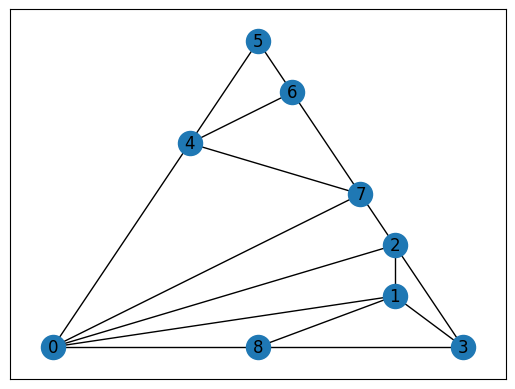

In [2]:
G_st = st_graph(seed=1) #  doesnt help when refresh.. 
p = Processor(G_st)
p.augment()
p.fix_separating_triangles()
# p.run()
pos = plot_planar(p.data.G, p.data.embed)

In [3]:
f = FourComplete2(p.data)
f.get_boundary_cyle()
f.boundary

[0, 8, 3, 2, 7, 6, 5, 4]

In [4]:
# cluster based on embedding 

In [5]:
p.data.embed

{0: array([-1.        , -0.36206897]),
 1: array([ 0.37931034, -0.22413793]),
 2: array([ 0.37931034, -0.0862069 ]),
 3: array([ 0.65517241, -0.36206897]),
 4: array([-0.44827586,  0.18965517]),
 5: array([-0.17241379,  0.46551724]),
 6: array([-0.03448276,  0.32758621]),
 7: array([0.24137931, 0.05172414]),
 8: array([-0.17241379, -0.36206897])}

In [8]:
boundary_embed = get_dict_subset(p.data.embed, f.boundary)
boundary_embed

{0: array([-1.        , -0.36206897]),
 8: array([-0.17241379, -0.36206897]),
 3: array([ 0.65517241, -0.36206897]),
 2: array([ 0.37931034, -0.0862069 ]),
 7: array([0.24137931, 0.05172414]),
 6: array([-0.03448276,  0.32758621]),
 5: array([-0.17241379,  0.46551724]),
 4: array([-0.44827586,  0.18965517])}

In [25]:
X = np.array([[v[0], v[1]] for v in boundary_embed.values()])
np.random.seed(42)
kmeans = KMeans(n_clusters=4,  init="k-means++") # TODO figure out why 
y_pred = kmeans.fit_predict(X)



/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
label_map = {b: l for b,l in zip(f.boundary, y_pred)}
label_map

{0: 0, 8: 3, 3: 1, 2: 1, 7: 1, 6: 2, 5: 2, 4: 2}

### visual 

In [35]:
# Plotting the clustered data with labels
trace = go.Scatter(x=X[:,0], y=X[:,1], mode='markers', marker=dict(color=y_pred, size=10, opacity=0.8))

layout = go.Layout(title='Clustered Data with Labels',
                   xaxis=dict(title='X'),
                   yaxis=dict(title='Y'))

fig = go.Figure(data=[trace], layout=layout)
fig.show()